In [1]:
import pandas as pd 
import numpy as np 
import pickle
import os
import helper_functions as hf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 

In [2]:
data_dir = 'C:/Users/mk344/OneDrive - Drexel University/Drexel courses/Fall Quarter 2019-2020/ECEC 487/microbiome_glove_embedding/data'
fig_dir = 'C:/Users/mk344/OneDrive - Drexel University/Drexel courses/Fall Quarter 2019-2020/ECEC 487/microbiome_glove_embedding/figures'

In [3]:
f = open(os.path.join(data_dir, "X_sample_property.obj"), "rb")
X = pickle.load(f)
f.close()

In [4]:
f = open(os.path.join(data_dir, "y_sample_ibd.obj"), "rb")
y = pickle.load(f)
f.close()
y = list(y[0].values)

In [9]:
# creating the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
# Hyperparameter tuning
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
mlp = MLPClassifier()
scv = StratifiedKFold(n_splits=10)
#Hyper Parameters Set
ftwo_scorer = make_scorer(fbeta_score, beta=0.5)
params = {'solver': ['lbfgs', 'sgd', 'adam'],
'alpha': 10.0 ** -np.arange(3, 7), 'hidden_layer_sizes':[(75,),(100,), (50,), (5,), (25,)],
'activation': ['logistic', 'tanh', 'relu']}

grid = GridSearchCV(mlp, param_grid=params, cv=scv, scoring=ftwo_scorer,n_jobs = -1)

In [7]:
grid.fit(X_train,y_train)

C:\Users\mk344\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mk344\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': [(75,), (100,), (50,),

In [8]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.6718754947996952
{'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': (75,), 'solver': 'adam'}
MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(75,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [10]:
# classifying the data using neural network
nnet_f1 = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(75,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
nnet_f2 = MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(75,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
nnet_f05 = MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(75,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
mdl = nnet_f05.fit(X_train, y_train)

C:\Users\mk344\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
from sklearn.metrics import accuracy_score
y_predict = mdl.predict(X_test)
acc_score = accuracy_score(y_test, y_predict)
print('score:', acc_score)

score: 0.96


roc_auc 0.7899168188273483 fpr [0.         0.         0.         0.00179695 0.00179695 0.00269542
 0.00269542 0.00359389 0.00359389 0.01347709 0.01347709 0.01617251
 0.01617251 0.03683738 0.03683738 0.04402516 0.04402516 0.05660377
 0.05660377 0.08086253 0.08086253 0.09074573 0.09074573 0.1015274
 0.1015274  0.11230907 0.11230907 0.11769991 0.11769991 0.12668464
 0.12668464 0.12848158 0.12848158 0.14375562 0.14375562 0.15453729
 0.15453729 0.18778077 0.18778077 0.20215633 0.20215633 0.20844564
 0.20844564 0.21473495 0.21473495 0.26055705 0.26055705 0.26594789
 0.26594789 0.2722372  0.2722372  0.32524708 0.32524708 0.38185085
 0.38185085 0.39532794 0.39532794 0.43036837 0.43036837 0.43126685
 0.43126685 0.45732255 0.45732255 0.49775382 0.49775382 0.50404313
 0.50404313 0.58580413 0.58580413 0.66127583 0.66127583 0.7771788
 0.7771788  0.78077269 0.78077269 0.86972147 0.86972147 0.88679245
 0.88679245 0.90296496 0.90296496 0.95867026 0.95867026 1.        ] tpr average_precision 0.47392204

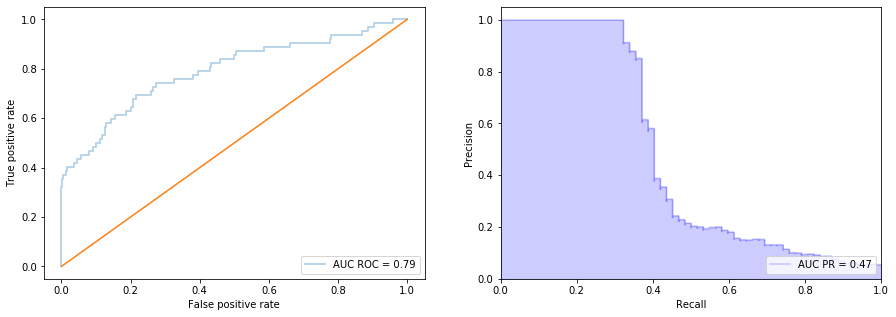

In [12]:
f = plt.figure(figsize=(15,5))
roc_auc, fpr, tpr, average_precision, f1, f2 = hf.computeMLstats(mdl, X_test, y_test, plot=True, plot_pr=True, flipped = False)
f.savefig(os.path.join(fig_dir, "neural_net_f05.png"))
print('roc_auc', roc_auc, 'fpr', fpr, 'tpr', 'average_precision', average_precision, 'f1', f1, 'f2', f2)

In [13]:
import csv
y_test_csv = [y_test]
y_predict_csv = [y_predict]
with open('./y_test_mlp_f05.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(y_test_csv)
with open('./y_predict_mlp_f05.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(y_predict_csv)